In [1]:
import sklearn.svm
from sklearn.metrics import accuracy_score
from ipynb.fs.full.Functions import load_train_test_data, load_train_test_oversampled, run_gridsearchCV, load_model, model_eval, run_randomizedsearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 


# SVM

# 1) SVM with normal preprocessed dataset


In [3]:
# Load the data
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


In [4]:
svm_model = sklearn.svm.SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.1)


Evaluation: accuracy_score
85.34% for the train data
87.80% for the test data

Evaluation: f1_score
80.23% for the train data
81.48% for the test data

Evaluation: recall_score
92.00% for the train data
84.62% for the test data

Evaluation: precision_score
71.13% for the train data
78.57% for the test data

Evaluation: confusion_matrix


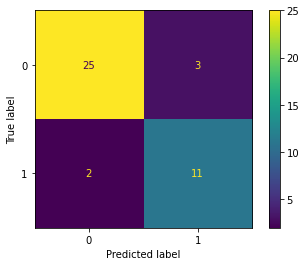


Evaluation: roc


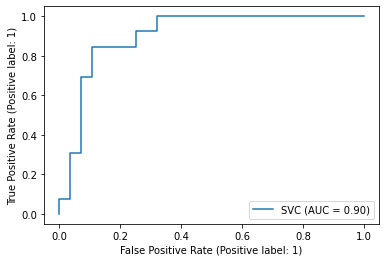

[(0.853448275862069, 0.8780487804878049),
 (0.8023255813953489, 0.8148148148148148),
 (0.92, 0.8461538461538461),
 (0.711340206185567, 0.7857142857142857)]

In [15]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [6]:
# define the grid for the hyperparameter search
grid_vals = { 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100],
            'degree': [1, 2, 3], 
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'class_weight': ['balanced', None]
            }


In [34]:
run_gridsearchCV(svm_model, grid_vals, X_train, y_train, scoring='accuracy')

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li

In [7]:
run_randomizedsearchCV(svm_model, grid_vals, X_train, y_train, scoring='accuracy')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=2, gamma=10, kernel=linear; to


Evaluation: accuracy_score
84.05% for the train data
80.49% for the test data

Evaluation: f1_score
75.17% for the train data
69.23% for the test data

Evaluation: recall_score
74.67% for the train data
69.23% for the test data

Evaluation: precision_score
75.68% for the train data
69.23% for the test data

Evaluation: confusion_matrix


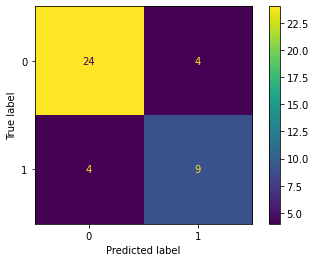


Evaluation: roc


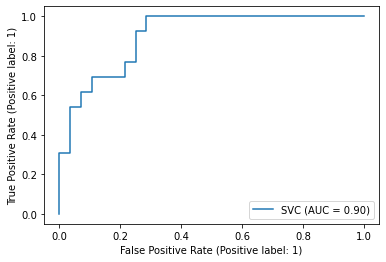

[(0.8405172413793104, 0.8048780487804879),
 (0.7516778523489932, 0.6923076923076923),
 (0.7466666666666667, 0.6923076923076923),
 (0.7567567567567568, 0.6923076923076923)]

In [8]:
# reload the best model & evaluate
rec_best_model = load_model(svm_model, 'accuracy')
model_eval(rec_best_model,X_train, X_test, y_train, y_test, confusion=True, roc=True)

# 1) SVM with normal oversampled dataset


In [9]:
X_train2, X_test2, y_train2, y_test2 = load_train_test_oversampled()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


In [10]:
svm_model2 = sklearn.svm.SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced')
svm_model2.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.1)


Evaluation: accuracy_score
89.92% for the train data
81.71% for the test data

Evaluation: f1_score
90.51% for the train data
73.68% for the test data

Evaluation: recall_score
96.12% for the train data
80.77% for the test data

Evaluation: precision_score
85.52% for the train data
67.74% for the test data

Evaluation: confusion_matrix


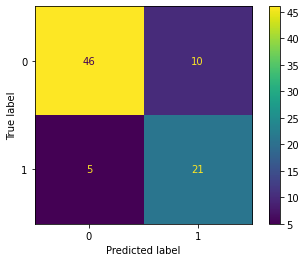


Evaluation: roc


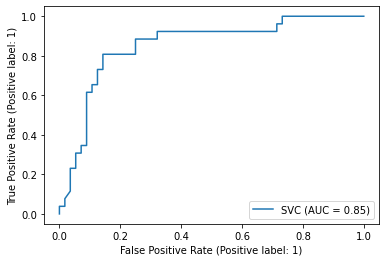

[(0.8992248062015504, 0.8170731707317073),
 (0.905109489051095, 0.7368421052631579),
 (0.9612403100775194, 0.8076923076923077),
 (0.8551724137931035, 0.6774193548387096)]

In [ ]:
model_eval(svm_model2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [39]:
run_gridsearchCV(svm_model2, grid_vals, X_train, y_train, scoring='accuracy')

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, degree=1, gamma=0.01, kernel=li

In [11]:
run_randomizedsearchCV(svm_model2, grid_vals, X_train, y_train, scoring='accuracy')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=None, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=3, ga


Evaluation: accuracy_score
84.05% for the train data
80.49% for the test data

Evaluation: f1_score
75.17% for the train data
69.23% for the test data

Evaluation: recall_score
74.67% for the train data
69.23% for the test data

Evaluation: precision_score
75.68% for the train data
69.23% for the test data

Evaluation: confusion_matrix


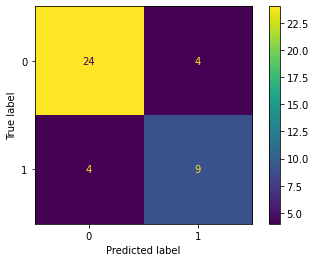


Evaluation: roc


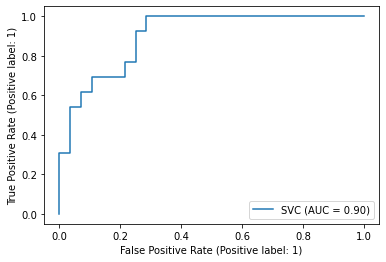

[(0.8405172413793104, 0.8048780487804879),
 (0.7516778523489932, 0.6923076923076923),
 (0.7466666666666667, 0.6923076923076923),
 (0.7567567567567568, 0.6923076923076923)]

In [12]:
# reload the best model & evaluate
rec_best_model = load_model(svm_model2, 'accuracy')
model_eval(rec_best_model,X_train, X_test, y_train, y_test, confusion=True, roc=True)